# **Students Marks Predictor**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('student_info.csv')

In [4]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


## Discover and visualize the data to gain insights  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


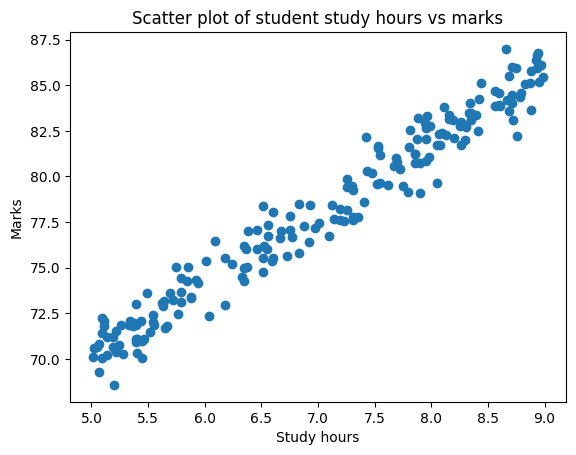

In [7]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel('Study hours')
plt.ylabel('Marks')
plt.title('Scatter plot of student study hours vs marks')
plt.show()

## prepare data for machine learning algorithms

In [8]:
# data cleaning
df.isnull().sum()

,0
study_hours,5
student_marks,0


In [9]:
df2 = df.fillna(df.mean())

In [10]:
df2.isnull().sum()

,0
study_hours,0
student_marks,0


In [11]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [12]:
# split dataset

x = df2.drop('student_marks', axis='columns')
y = df2.drop('study_hours', axis='columns')
print('shape of x= ', x.shape)
print('shape of y= ', y.shape)


shape of x=  (200, 1)
shape of y=  (200, 1)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test= train_test_split(x, y, test_size=0.2, random_state=52)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 1)
(40, 1)
(160, 1)
(40, 1)


## select a model and train it

In [15]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
lr.coef_

array([[3.97731714]])

In [18]:
lr.intercept_

array([50.11685353])

In [22]:
m = 3.93
c = 50.44
y= m*4+c
y

66.16

In [23]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.03

In [24]:
y_pred = lr.predict(x_test)
y_pred

array([[76.36714668],
       [75.37281739],
       [77.28192962],
       [78.43535159],
       [78.87285648],
       [73.38415882],
       [78.99217599],
       [85.63429562],
       [71.03754171],
       [72.98642711],
       [85.71384197],
       [82.73085411],
       [70.04321242],
       [76.88419791],
       [85.43542977],
       [73.14551979],
       [71.11708805],
       [81.53765897],
       [82.96949314],
       [72.66824173],
       [76.00918814],
       [83.12858582],
       [72.54892222],
       [75.45236374],
       [80.70242237],
       [70.75912951],
       [72.86710759],
       [70.44094413],
       [73.14551979],
       [72.07164416],
       [70.28185145],
       [71.95232465],
       [74.33871494],
       [79.35013454],
       [82.92971997],
       [77.9419603 ],
       [73.34438565],
       [77.9419603 ],
       [85.3956566 ],
       [84.75928585]])

In [25]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns= ['study_hours', 'student_marks_original', 'student_marks_predicted'])

,study_hours,student_marks_original,student_marks_predicted
0,6.600000,75.55,76.367147
1,6.350000,76.19,75.372817
2,6.830000,75.80,77.281930
3,7.120000,78.42,78.435352
4,7.230000,77.55,78.872856
5,5.850000,75.02,73.384159
6,7.260000,79.87,78.992176
7,8.930000,85.96,85.634296
8,5.260000,71.86,71.037542
9,5.750000,75.03,72.986427


## Fine tuning the model

In [26]:
lr.score(x_test, y_test)

0.9424696866315473

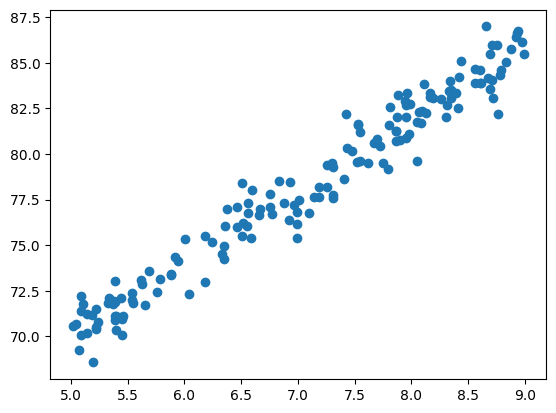

In [27]:
plt.scatter(x_train, y_train)

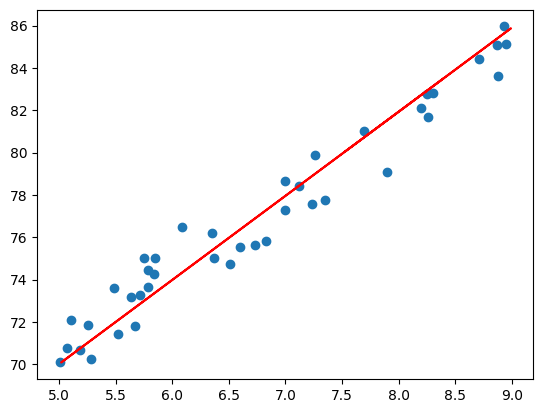

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color ='r')

presenting the solution


In [29]:
# save ML model using joblib
import joblib
joblib.dump(lr, 'student_marks.pkl')

['student_marks.pkl']

In [30]:
model = joblib.load('student_marks.pkl')

In [33]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.00343924847365